In [1]:
import keras
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import plot_model
%matplotlib inline

Using TensorFlow backend.


In [2]:
data = pd.read_csv('mushrooms.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data = pd.get_dummies(data)

In [5]:
data.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
data = data.drop('class_p', axis=1)

In [7]:
y = data['class_e']
X = data.drop('class_e', axis=1)

In [8]:
#Splitting the dataset into training and testdata: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1447)

In [9]:
#set up the model: 
model = Sequential()

In [10]:
#building the NN:
model.add(Dense(117, activation='relu', input_shape=(117,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#training the model
history = model.fit(X_train, to_categorical(y_train), epochs=8)

Epoch 1/8
4062/4062 [==============================] - 1s 125us/step - loss: 0.1051 - acc: 0.9623
Epoch 2/8
4062/4062 [==============================] - 0s 40us/step - loss: 0.0032 - acc: 0.9998
Epoch 3/8
4062/4062 [==============================] - 0s 41us/step - loss: 8.2101e-04 - acc: 1.0000
Epoch 4/8
4062/4062 [==============================] - 0s 41us/step - loss: 3.5658e-04 - acc: 1.0000
Epoch 5/8
4062/4062 [==============================] - 0s 40us/step - loss: 1.9536e-04 - acc: 1.0000
Epoch 6/8
4062/4062 [==============================] - 0s 42us/step - loss: 1.2592e-04 - acc: 1.0000
Epoch 7/8
4062/4062 [==============================] - 0s 45us/step - loss: 8.5109e-05 - acc: 1.0000
Epoch 8/8
4062/4062 [==============================] - 0s 41us/step - loss: 6.2668e-05 - acc: 1.0000


In [13]:
predictions = model.predict_classes(X_test)

In [14]:
cr = classification_report(y_test,predictions)
cfm = confusion_matrix(y_test,predictions)
evaluation = model.evaluate(x=X_test, y=to_categorical(y_test), batch_size=None, verbose=1, sample_weight=None, steps=200)

print('Classification Report: ')
print(cr)
print('Confusion Matrix: ')
print(cfm)
print('Model Evaluation: ')
print(evaluation)

200/200 [==============================] - 3s 13ms/step
Classification Report: 
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1962
          1       1.00      1.00      1.00      2100

avg / total       1.00      1.00      1.00      4062

Confusion Matrix: 
[[1962    0]
 [   0 2100]]
Model Evaluation: 
[6.850116915302351e-05, 1.0]


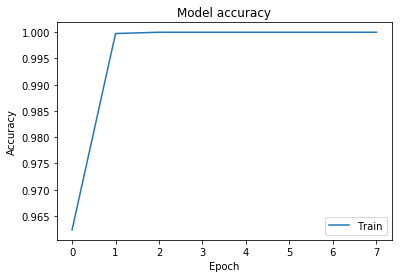

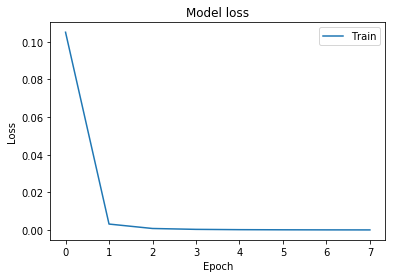

In [15]:

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()